**Installing apyori**

#**Mall Recommendation System**
Clustering related products into a one package (offer)

In [1]:
!pip install apyori

**Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

https://www.kaggle.com/roshansharma/market-basket-optimization

In [3]:
dataSet = pd.read_csv('/content/drive/My Drive/data/Market_Basket_Optimisation.csv', header=None)
n = dataSet.shape[0]

In [4]:
print('Data shape (rows, cols): ', dataSet.shape)
dataSet.sample(10)

Data shape (rows, cols):  (7501, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
3993,herb & pepper,spaghetti,pancakes,low fat yogurt,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2359,tomatoes,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4628,frozen vegetables,tomatoes,mineral water,chicken,salmon,muffins,chocolate,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,grated cheese,muffins,french fries,body spray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6613,brownies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7214,milk,tea,frozen smoothie,tomato juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3370,pasta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5564,cookies,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4317,shrimp,tomatoes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2271,red wine,french wine,salmon,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [6]:
dataSet.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,frozen smoothie,frozen smoothie,protein bar,cereals,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


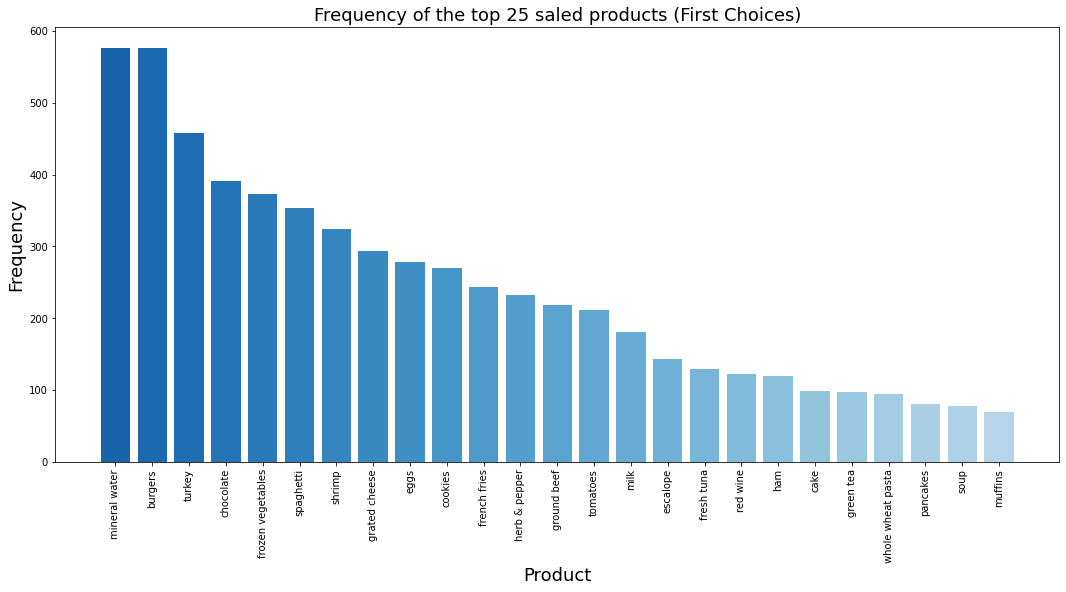

,Frequency
mineral water,577
burgers,576
turkey,458
chocolate,391
frozen vegetables,373
spaghetti,354
shrimp,325
grated cheese,293
eggs,279
cookies,270


In [7]:
plt.figure(figsize=(18, 8))
plt.bar(dict(dataSet[0].value_counts()[:25]).keys(), 
        dict(dataSet[0].value_counts()[:25]).values(),
        color = plt.cm.Blues(np.linspace(0.8, 0.3, 25)))
plt.title('Frequency of the top 25 saled products (First Choices)', size=18)
plt.xlabel('Product', size=18)
plt.ylabel('Frequency', size=18)
plt.xticks(rotation = 90 )
plt.show()

#Frequency of the top 25 saled products (First Choices)
pd.DataFrame(data = dict(dataSet[0].value_counts()[:25]).values(),
             index = dict(dataSet[0].value_counts()[:25]).keys(),
             columns = ['Frequency'])

In [8]:
#Data cleaning
X = []

for i in range(n):
    X.append([])

    for j in range(0, 20):
        if str(dataSet.values[i, j]) != 'nan':
            X[i].append(str(dataSet.values[i, j]))

**Training the Apriori model on the dataset**

In [9]:
from apyori import apriori

rules = apriori(X, 
                min_support = 0.003, 
                min_confidence = 0.2, 
                min_lift = 3, 
                min_length = 2)

**Processing the rules**

In [10]:
#Making a list of related items
rules = list(rules)
result = [list(rules[i][0]) for i in range(0, len(rules))]

result

[['light cream', 'chicken'],
 ['mushroom cream sauce', 'escalope'],
 ['pasta', 'escalope'],
 ['honey', 'fromage blanc'],
 ['herb & pepper', 'ground beef'],
 ['tomato sauce', 'ground beef'],
 ['light cream', 'olive oil'],
 ['olive oil', 'whole wheat pasta'],
 ['shrimp', 'pasta'],
 ['avocado', 'milk', 'spaghetti'],
 ['cake', 'burgers', 'milk'],
 ['chocolate', 'burgers', 'turkey'],
 ['burgers', 'turkey', 'milk'],
 ['cake', 'frozen vegetables', 'tomatoes'],
 ['cereals', 'ground beef', 'spaghetti'],
 ['milk', 'ground beef', 'chicken'],
 ['milk', 'olive oil', 'chicken'],
 ['spaghetti', 'olive oil', 'chicken'],
 ['chocolate', 'frozen vegetables', 'shrimp'],
 ['herb & pepper', 'chocolate', 'ground beef'],
 ['chocolate', 'milk', 'soup'],
 ['cooking oil', 'spaghetti', 'ground beef'],
 ['herb & pepper', 'ground beef', 'eggs'],
 ['red wine', 'spaghetti', 'eggs'],
 ['herb & pepper', 'french fries', 'ground beef'],
 ['frozen vegetables', 'green tea', 'tomatoes'],
 ['frozen vegetables', 'ground beef'

In [11]:
packages = []
for package in result:
  packages.append(', '.join(package))

packages

['light cream, chicken',
 'mushroom cream sauce, escalope',
 'pasta, escalope',
 'honey, fromage blanc',
 'herb & pepper, ground beef',
 'tomato sauce, ground beef',
 'light cream, olive oil',
 'olive oil, whole wheat pasta',
 'shrimp, pasta',
 'avocado, milk, spaghetti',
 'cake, burgers, milk',
 'chocolate, burgers, turkey',
 'burgers, turkey, milk',
 'cake, frozen vegetables, tomatoes',
 'cereals, ground beef, spaghetti',
 'milk, ground beef, chicken',
 'milk, olive oil, chicken',
 'spaghetti, olive oil, chicken',
 'chocolate, frozen vegetables, shrimp',
 'herb & pepper, chocolate, ground beef',
 'chocolate, milk, soup',
 'cooking oil, spaghetti, ground beef',
 'herb & pepper, ground beef, eggs',
 'red wine, spaghetti, eggs',
 'herb & pepper, french fries, ground beef',
 'frozen vegetables, green tea, tomatoes',
 'frozen vegetables, ground beef, spaghetti',
 'frozen vegetables, olive oil, milk',
 'frozen vegetables, soup, milk',
 'frozen vegetables, tomatoes, milk',
 'frozen vegetabl

In [13]:
#Making a dataframe for the packages
packages_df = pd.DataFrame(data = packages,
             index = ['Package ' + str(i+1) for i in range(len(packages))],
             columns = ['Products'])
packages_df['# of Products'] = [len(x) for x in result]


#Printing the packages
pd.set_option('display.max_rows', len(packages_df))
display(packages_df)
pd.reset_option('display.max_rows')

,Products,# of Products
Package 1,"light cream, chicken",2
Package 2,"mushroom cream sauce, escalope",2
Package 3,"pasta, escalope",2
Package 4,"honey, fromage blanc",2
Package 5,"herb & pepper, ground beef",2
Package 6,"tomato sauce, ground beef",2
Package 7,"light cream, olive oil",2
Package 8,"olive oil, whole wheat pasta",2
Package 9,"shrimp, pasta",2
Package 10,"avocado, milk, spaghetti",3


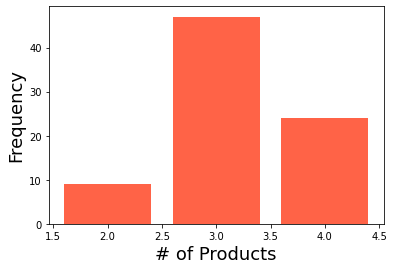

,Frequency
3,47
4,24
2,9


In [14]:
plt.bar(dict(packages_df['# of Products'].value_counts()).keys(), 
        dict(packages_df['# of Products'].value_counts()).values(),
        color='tomato')
plt.xlabel('# of Products', size=18)
plt.ylabel('Frequency', size=18)
plt.show()


pd.DataFrame(data = dict(packages_df['# of Products'].value_counts()).values(),
             index = dict(packages_df['# of Products'].value_counts()).keys(),
             columns = ['Frequency'])